In [32]:
import tensorflow 
import keras  
import os
import glob 
from skimage import io 
import random 
import numpy as np
import matplotlib.pyplot as plt  
from skimage.color import rgb2gray
%matplotlib inline

In [33]:
dataset_path = r'C:\Users\sarsa\Animals'
class_names = ['Cheetah', 'Jaguar', 'Leopard', 'Lion','Tiger']

# apply glob module to retrieve files/pathnames  

animal_path = os.path.join(dataset_path, class_names[1], '*')
animal_path = glob.glob(animal_path)

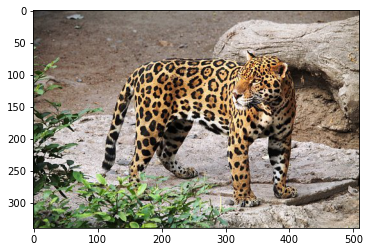

In [34]:
# accessing an image file from the dataset classes
image = io.imread(animal_path[4])  

# plotting the original image
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

Text(0.5, 0.98, 'Original & RGB image channels')

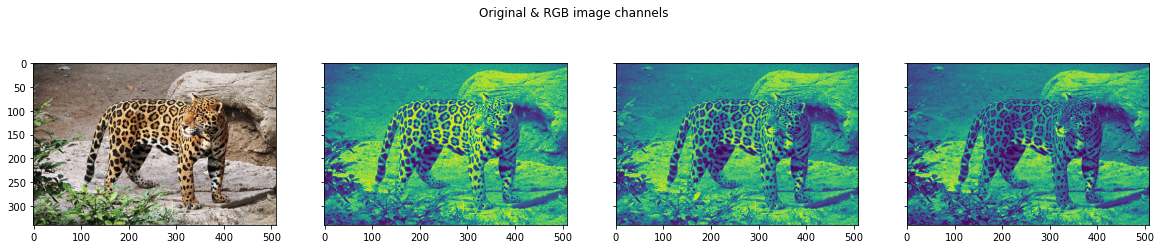

In [35]:
i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20) 

im1.imshow(image)  #Original image
im2.imshow(image[:, : , 0]) #Red
im3.imshow(image[:, : , 1]) #Green
im4.imshow(image[:, : , 2]) #Blue
i.suptitle('Original & RGB image channels')

In [43]:
#Data preprocessing

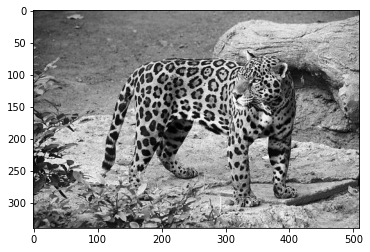

In [44]:
#Grayscale is simply converting images from colored to black and white. 
#It is normally used to reduce computation complexity in machine learning algorithms.

gray_image = rgb2gray(image)
plt.imshow(gray_image, cmap = 'gray')

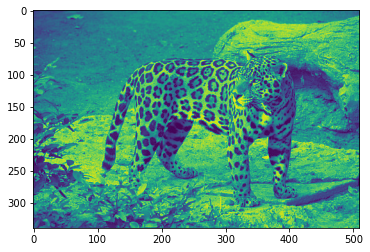

In [45]:
#Normalization is usually applied to convert an image’s pixel values to a typical or more familiar sense.

norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
plt.imshow(norm_image)

In [48]:
#Data augmentation is the process of making minor alterations 
#to existing data to increase its diversity without collecting new data.

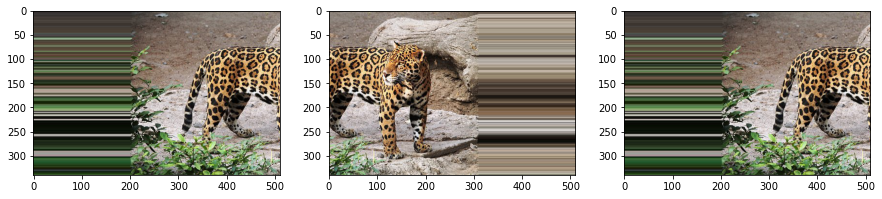

In [46]:
# import libraries

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

# convert to numpy array
data = img_to_array(image)

# expand dimension to one sample
samples = expand_dims(image, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(image) 

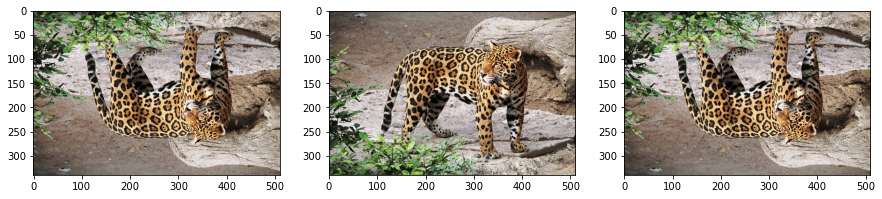

In [49]:
# ImageDataGenerator for flipping
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(image) 

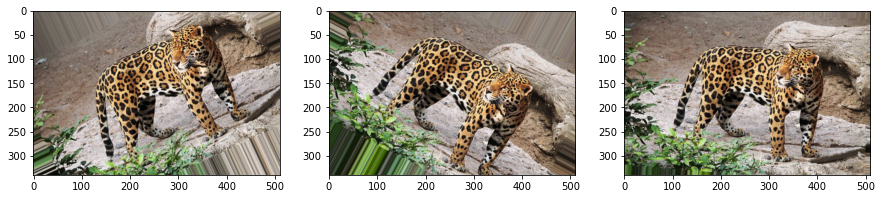

In [51]:
datagen = ImageDataGenerator(rotation_range=60, fill_mode='nearest')
# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(image) 

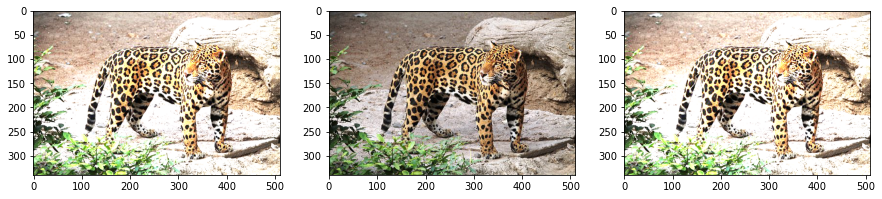

In [52]:
datagen = ImageDataGenerator(brightness_range=[0.5,2.0])
# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(image) 

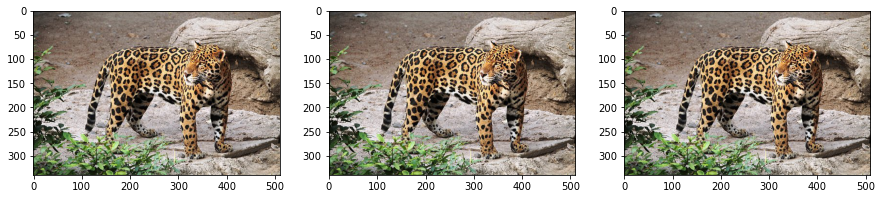

In [53]:
# creating the image data generator to standardize images
datagen = ImageDataGenerator(featurewise_center =True,
      featurewise_std_normalization = True)
# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(image) 